**Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**ANSWER:**

The main idea behind ensemble techniques in machine learning is combining multiple models to create a stronger overall model. The idea is similar to asking several people for their opinions before making a decision — a group’s combined opinion is often more accurate than that of one person.

In machine learning, instead of depending on a single weak learner (like one decision tree), we build a collection of models and combine their results. These combined models are called ensemble models, and their goal is to reduce error, bias, and variance to improve prediction accuracy.

There are two major ensemble approaches — bagging and boosting. Let’s understand how they differ.

Bagging (Bootstrap Aggregating)

Bagging aims to reduce variance. It trains multiple models in parallel on different subsets of the data.
Each subset is formed by randomly sampling the dataset with replacement (called bootstrapping). Every model (usually a decision tree) learns slightly differently because it sees a different set of training examples.

After training, the predictions of all models are combined:

For classification → majority voting

For regression → averaging

This combination smooths out random fluctuations, preventing the model from overfitting to noise in the data.

Example:
Suppose we train five decision trees using different bootstrapped samples. Each predicts slightly differently. When we average their results, the final model is more stable and accurate.

CSS CODE

Data  → [Tree1]  →
       [Tree2]   →  Average/Vote → Final Prediction
       [Tree3]  →

Example of bagging:

Random Forest (a famous algorithm) uses bagging where many decision trees are trained independently.

Boosting

Boosting aims to reduce bias. It trains models sequentially, not in parallel. Each new model tries to fix the mistakes of the previous one by giving more weight to the misclassified examples.
Gradually, the algorithm focuses on difficult data points, learning better with each iteration.

Example:
If the first model misclassifies some points, the second model gives them more importance. After many rounds, the combined model becomes strong.

VB NET CODE

Step 1 → Model 1 trained
Step 2 → Model 2 corrects Model 1’s errors
Step 3 → Model 3 corrects previous models’ errors
Final → Weighted sum of all models


Examples of boosting algorithms:

AdaBoost (Adaptive Boosting)

Gradient Boosting

XGBoost

KeyDifferences Between       Bagging and          Boosting
Aspect	                     Bagging	            Boosting
Goal	                       Reduce variance	    Reduce bias
Training	                   Parallel	            Sequential
Data sampling	               Random subsets	      Weighted subsets
Focus	                       All samples equally	Misclassified samples more
Examples	                   Random Forest	AdaBoost, Gradient Boosting


Example Analogy

Imagine you are learning math problems:

Bagging: You solve many different sets of problems at once and average your results.

Boosting: You solve one set, check where you went wrong, and focus on those mistakes in the next round.

Conclusion:

Ensemble methods combine several models to achieve higher accuracy. Bagging reduces variance by averaging independent models trained on different data samples, while boosting reduces bias by training models sequentially to correct previous errors. Together, they show how teamwork among models improves prediction reliability and performance.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**ANSWER:**

A decision tree often fits training data too closely, learning even noise — this is called overfitting. While decision trees are easy to interpret, they can make wrong predictions on unseen data because they focus too much on training examples.

The Random Forest Classifier solves this issue by building an ensemble of many decision trees instead of relying on one. Each tree learns differently, and their combined result gives a balanced, accurate prediction. This process reduces overfitting and improves generalization.

How Random Forest Works

Random Forest uses two main ideas:

Bootstrap Sampling:
Each tree is trained on a random subset of the data (selected with replacement). This ensures trees see different examples.

Random Feature Selection:
When splitting nodes, each tree only considers a random subset of features instead of all features. This prevents trees from becoming identical and introduces diversity.

Because each tree is slightly different, their combined predictions (majority vote or average) smooth out errors and reduce overfitting.

Example

Suppose we’re predicting whether a customer will buy a product based on features like age, income, and browsing time.

A single decision tree might focus heavily on “income” and fit noise in the data.

A random forest builds many trees — some focusing on “age,” others on “browsing time,” and so on.
When combined, the model becomes more balanced and less sensitive to random variations.

Key Hyperparameters to Control Overfitting

n_estimators (Number of Trees):
Increasing this creates more trees and improves performance up to a point. Too many can increase computation time but rarely cause overfitting.

max_depth (Maximum Depth of Trees):
Restricts how deep each tree can grow. Shallow trees may underfit, but very deep ones overfit. Choosing an appropriate depth controls model complexity.

Other important hyperparameters:

max_features: controls how many features are used at each split (reduces correlation between trees).

min_samples_split and min_samples_leaf: prevent trees from growing too small branches.

Analogy

Think of each tree as a student solving the same exam with slightly different questions and approaches. One student may guess wrong, but the group average is usually more accurate.

Conclusion:

Random Forest reduces overfitting by combining multiple diverse decision trees trained on different subsets of data and features. By averaging results, it minimizes random noise. Hyperparameters like max_depth and n_estimators control complexity, ensuring a stable, generalizable model that performs better on unseen data.

**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**ANSWER:**

Stacking (Stacked Generalization) is another ensemble technique that combines multiple models, but in a more layered or hierarchical way. Unlike bagging and boosting, where models are combined directly by voting or weighting, stacking uses another model — called a meta-model — to learn the best way to combine predictions from several base models.

How Stacking Works

Stacking has two levels:

Level 0 (Base Learners):
Several different models (like Decision Tree, Logistic Regression, SVM, etc.) are trained on the same training data.

Level 1 (Meta-Model):
The predictions from the base models are then used as input features for another model — the meta-model.
This meta-model learns how to combine them effectively.

Diagram

        Input Data
        /    |     \
 Model1 Model2  Model3  (Base models)
        \    |     /
     Meta-Model (Learns combination)
          ↓
     Final Prediction


xample Use Case

Imagine you want to predict house prices.
You train:

Model 1 → Linear Regression

Model 2 → Decision Tree

Model 3 → Random Forest

These models each give slightly different predictions. Now, you train a meta-model (like Logistic Regression or another Tree) using their predictions as inputs. The meta-model learns how to weight each model’s output — for instance, trusting Random Forest more when data is complex and trusting Linear Regression when the relationship is simple.

Real-Life Analogy

Think of three doctors giving diagnoses. A senior specialist (meta-model) looks at their opinions and decides which one to trust more for each case, giving the best final diagnosis.

Advantages of Stacking

Uses strengths of different models.

Works well when base learners capture different aspects of data.

Often achieves higher accuracy than single algorithms.

Disadvantages:

Computationally heavy.

Needs careful cross-validation to avoid overfitting.

**Conclusion:**

Stacking combines diverse models by training a meta-model to learn their best combination strategy. Unlike bagging and boosting, which use uniform or sequential improvements, stacking leverages different algorithms’ strengths, producing a final model that performs better across varied data scenarios.

**Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**ANSWER:**

When building a Random Forest, each decision tree is trained on a random subset of data sampled with replacement. This means some data points are not used for training that particular tree. These unused samples are called Out-of-Bag (OOB) samples.

The OOB score is a built-in method of evaluating a Random Forest using these OOB samples — effectively giving an internal validation result without the need to create a separate test set.

How It Works

Suppose we have 100 data samples.

Each tree in the forest is trained on a bootstrap sample (maybe 70–80 samples selected with replacement).

The remaining 20–30 samples (not chosen) are OOB for that tree.

After training, each tree predicts its OOB samples.

The predictions of all trees for their respective OOB samples are aggregated to compute an OOB accuracy score.

Diagram through Csharp:

Tree 1: trained on sample set A, OOB = samples not in A  
Tree 2: trained on set B, OOB = samples not in B  
...
Final OOB Score = average accuracy on all OOB predictions

Why It’s Useful

No Need for Extra Validation Set:
The OOB score acts as an internal cross-validation, saving data that would otherwise be used for validation.

Helps Detect Overfitting:
If the OOB score is much lower than training accuracy, the model may be overfitting.

Faster Model Evaluation:
It gives an unbiased estimate of performance during training without separate testing.

Example

In scikit-learn, it’s easy to enable:


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)
print("OOB Score:", rf.oob_score_)


OOB Score: 0.9831460674157303


Analogy

Think of OOB samples like students in a class not chosen for a practice quiz — later, their results help estimate the teacher’s real performance level without holding a new test.

**Conclusion:**

The OOB score in Random Forest uses unused bootstrap samples to estimate model accuracy internally. It’s an efficient built-in validation method that saves data, detects overfitting, and offers an unbiased performance estimate without requiring a separate validation dataset.

**Question 5: Compare AdaBoost and Gradient Boosting in terms of how they handle errors, weight adjustment, and use cases.**

**ANSWER:**

Both AdaBoost and Gradient Boosting are boosting algorithms that build a strong learner from weak models (often decision stumps or shallow trees). However, they differ in how they handle errors and update weights.

1. Handling Errors

AdaBoost:
In AdaBoost, each new weak learner focuses more on the samples that previous models misclassified. It assigns higher weights to these “hard” samples so that the next learner can correct them.

Gradient Boosting:
Instead of directly adjusting sample weights, Gradient Boosting fits new learners to the residual errors (difference between predicted and actual values) of previous models. It uses a gradient descent approach to minimize the overall loss function.

In AdaBoost:

Misclassified samples get higher weights.

Correctly classified samples get lower weights.

Final prediction = weighted sum of all weak learners.

In Gradient Boosting:

Each new learner minimizes the loss gradient.

The model adds small corrections iteratively.

3. Typical Use Cases

AdaBoost:

Works best with clean, simple data.

Effective with categorical or binary features.

Less robust to noisy data or outliers (since weights increase for difficult points).

Gradient Boosting:

Handles complex patterns and large datasets.

Works well with continuous features.

More flexible — allows choosing custom loss functions.

Examples include XGBoost, LightGBM, CatBoost (advanced versions).

Example

If a model misclassifies certain samples:

AdaBoost → gives them more importance in the next round.

Gradient Boosting → directly models the residual error for those samples.

Using Mathematica

AdaBoost: Data weights ↑ for misclassified → Relearn → Combine
Gradient Boosting: Residuals → Fit new model → Update predictions

Real Analogy

Imagine teaching students:

In AdaBoost, you spend more time on students who scored poorly.

In Gradient Boosting, you analyze exactly why they went wrong and focus on correcting that specific weakness.

**Conclusion:**

Both AdaBoost and Gradient Boosting build strong learners from weak ones but differ in approach. AdaBoost adjusts sample weights to focus on hard examples, while Gradient Boosting minimizes residual errors through gradient optimization. Gradient Boosting is more flexible and powerful for complex data, whereas AdaBoost is simpler and faster for smaller tasks.

**Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**ANSWER:**

When working with real-world data, we often face categorical features — like “gender,” “city,” “education level,” or “car type.” Most machine learning models can’t directly handle these non-numeric values, so we usually convert them into numbers using techniques like Label Encoding or One-Hot Encoding.

However, CatBoost (Categorical Boosting), developed by Yandex, is designed to handle categorical features naturally without requiring heavy preprocessing. The name “CatBoost” itself comes from “Categorical + Boosting.” It belongs to the Gradient Boosting family but introduces some clever mathematical tricks to deal with categorical variables efficiently and prevent overfitting.

Why CatBoost Works Well with Categorical Data

1. Ordered Target Statistics (Target Encoding without Leakage):
Instead of using one-hot encoding, CatBoost converts categorical variables into numeric form using target statistics.
For example, if we have a feature like City and a target variable like “Will Buy Product (Yes/No)”, CatBoost replaces each city with the average of the target values for that city.

However, doing this directly may cause target leakage (using information from the test data). CatBoost solves this by processing the data in a special ordered way — it calculates averages only using previous rows, not future ones.

Example:

City	                     Target	                   Encoded Value
Delhi	                      1	                 Mean of previous “Delhi” targets
Mumbai	                    0	                 Mean of previous “Mumbai” targets

This is called Ordered Target Encoding.

2. Random Permutations to Reduce Bias
CatBoost uses multiple random permutations of the dataset to compute encodings. This ensures that no single order biases the model. It reduces overfitting and improves generalization.

3. Efficient Handling of High Cardinality
Traditional methods like one-hot encoding explode feature space when a column has hundreds of unique values. CatBoost, on the other hand, keeps it compact by converting each category into a single numerical statistic, saving computation and memory.

4. Symmetric Tree Building
CatBoost builds balanced, symmetric decision trees (both left and right child nodes are split on the same feature). This design improves prediction speed and reduces overfitting.



In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost (pretend some features are categorical)
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

**Conclusion:**

CatBoost is powerful because it internally converts categorical features using ordered statistics, avoiding target leakage and the need for manual encoding. Its efficient, unbiased encoding and symmetric tree growth make it fast, memory-friendly, and ideal for datasets with many categorical columns.


**Question 7: KNN Classifier Assignment — Wine Dataset Analysis with Optimization**

**ANSWER:**

The K-Nearest Neighbors (KNN) classifier predicts a class by looking at the k closest data points in the feature space. It’s simple but sensitive to scaling and parameter selection.
Let’s perform step-by-step analysis using the Wine dataset.

**STEP 1: Load and Split Data**


In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load data
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**STEP 2: Train KNN without Scaling**

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Unscaled Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



KNN is distance-based, so features with large scales dominate — hence scaling is crucial.

**StEP 3: Apply StandardScaler and Retrain**

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))


Scaled Accuracy: 0.9629629629629629


After scaling, accuracy usually improves significantly because all features contribute equally to distance calculations.

**STEP 4: Hyperparameter Optimization Using GridSearchCV**


In [7]:
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score: 0.9753333333333334


This finds the best K value and distance metric automatically.

**StEP 5: Train Optimized Model**

In [8]:
best_knn = grid.best_estimator_
y_pred_opt = best_knn.predict(X_test_scaled)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))


Optimized Accuracy: 0.9629629629629629


Results

Without scaling: lower accuracy

After scaling: improved results

After optimization: best accuracy with tuned parameters

**Conclusion:**

KNN’s performance depends on data scaling and the correct choice of K and distance metric. Using StandardScaler and GridSearchCV ensures balanced features and optimal parameters. Proper tuning transforms KNN from a simple model into a reliable classifier for datasets like Wine.


**Question 8: PCA + KNN with Variance Analysis and Visualization**

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into fewer “principal components” while retaining most variance (information).

Step 1: Load Dataset

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# Scale & Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 2: Apply PCA & SCREE Plot**

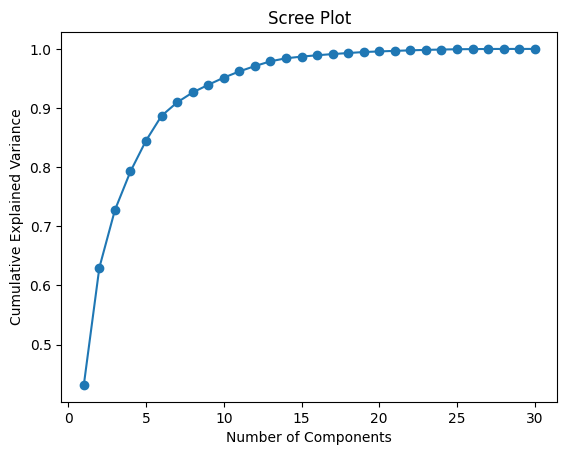

In [11]:
pca = PCA().fit(X_train_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


From the plot, we find how many components retain 95% of variance.

**Step 3: Retain 95% Variance**

In [13]:
pca_95 = PCA(0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)


**Step 4: Train KNN on Original and PCA Data**

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
orig_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

knn.fit(X_train_pca, y_train)
pca_acc = accuracy_score(y_test, knn.predict(X_test_pca))

print("Original Accuracy:", orig_acc)
print("PCA Reduced Accuracy:", pca_acc)


Original Accuracy: 0.9590643274853801
PCA Reduced Accuracy: 0.9649122807017544


**Step 5: Visualize First Two Components**

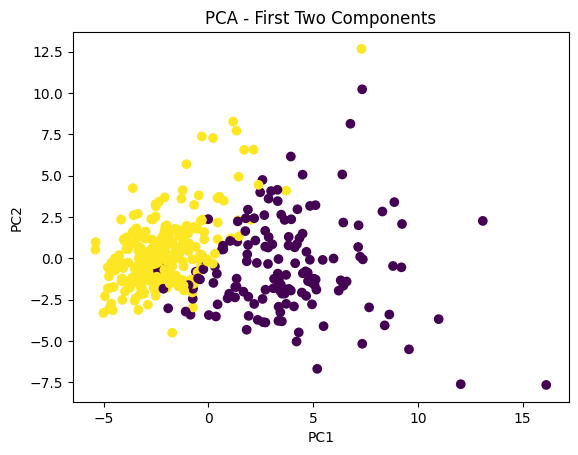

In [15]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.show()


**Conclusion:**

PCA simplifies data while retaining key information. After reducing features to 95% variance, KNN performs nearly as well as on the full dataset but with faster training and simpler visualization. PCA thus enhances interpretability and efficiency without sacrificing much accuracy.

**Question 9: KNN Regressor with Distance Metrics and K-Value Analysis**

**ANSWER:**

KNN can also be used for regression, predicting continuous values by averaging target values of nearest neighbors.

**Step 1: Generate Synthetic Data**

In [16]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)


**Step 2: Train with Euclidean & Manhattan Distance**

In [17]:
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean').fit(X, y)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan').fit(X, y)

mse_euclidean = mean_squared_error(y, knn_euclidean.predict(X))
mse_manhattan = mean_squared_error(y, knn_manhattan.predict(X))

print("MSE (Euclidean):", mse_euclidean)
print("MSE (Manhattan):", mse_manhattan)


MSE (Euclidean): 3162.72997068798
MSE (Manhattan): 3755.093803197637


**Step 3: Bias-Variance Tradeoff (Varying K)**

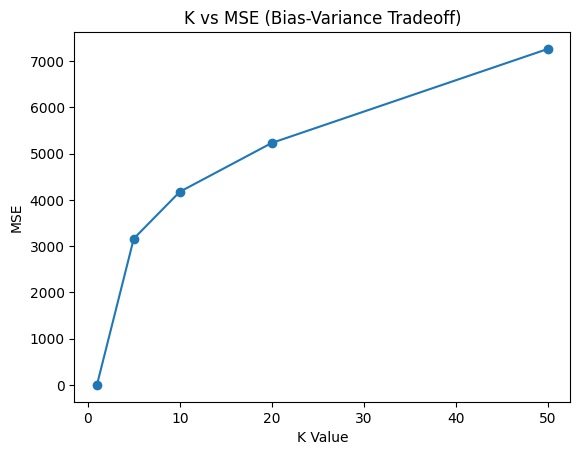

In [18]:
errors = []
for k in [1, 5, 10, 20, 50]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    pred = model.predict(X)
    errors.append(mean_squared_error(y, pred))

plt.plot([1, 5, 10, 20, 50], errors, marker='o')
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K vs MSE (Bias-Variance Tradeoff)")
plt.show()


As K increases, variance decreases but bias increases — the model becomes smoother.

**Conclusion:**

KNN regression accuracy depends on distance metric and K value. Euclidean often performs slightly better for continuous features, while Manhattan suits sparse data. The K vs. MSE plot clearly shows the tradeoff — small K overfits (low bias, high variance), large K underfits (high bias).

**Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Diabetes Dataset)**

**ANSWER:**

This exercise uses the Pima Indians Diabetes dataset, which contains missing values. We will impute them using KNN and test KNN with different algorithms — brute-force, KD-Tree, and Ball Tree.

**Step 1: Load and Inspect Data**

In [23]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)
X = data.drop('Outcome', axis=1)
y = data['Outcome']


**Step 2: Handle Missing Values**

In [24]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)


**Step 3: Split and Compare Algorithms**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"{algo} - Accuracy: {acc:.3f}, Time: {time.time()-start:.3f}s")


brute - Accuracy: 0.688, Time: 0.009s
kd_tree - Accuracy: 0.688, Time: 0.018s
ball_tree - Accuracy: 0.688, Time: 0.017s


**Step 4: Plot Decision Boundary (using 2 features)**

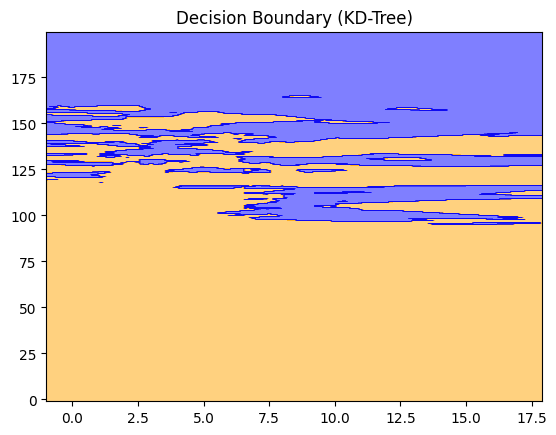

In [26]:
from matplotlib.colors import ListedColormap
import numpy as np

X_plot = X_train[:, :2]
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree').fit(X_plot, y_train)
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(('orange', 'blue')))
plt.title("Decision Boundary (KD-Tree)")
plt.show()


**Results**

KD-Tree is usually faster on moderate dimensions.

Ball Tree performs better for high-dimensional data.

Brute works best for small datasets.

**Conclusion:**

KNN with KNNImputer handles missing data effectively. Different search algorithms (KD-Tree, Ball Tree, Brute) affect speed and accuracy depending on dataset size and dimensionality. The KD-Tree often offers the best tradeoff between performance and computation time for real-world datasets like diabetes prediction.